<a href="https://colab.research.google.com/github/Ice-CreamAT/PerceptronStep/blob/main/PerceptronStep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **PERCEPTRON (STEP)**

In [ ]:
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

def activation(z):
    if (z >= 0):
        return 1
    return 0

def predict(X, weights, bias):
    predicts = []
    for x in X:
        z = np.dot(x, weights) + bias
        predicts.append(activation(z))
    return np.array(predicts)

In [ ]:
def training_perceptron(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    weights, bias = initialize_weights(n_features)

    y_ = np.array([1 if i > 0 else 0 for i in y]) # Ensures that y is in {0,1}

    # Training
    for _ in range(n_iterations):
        for idx, x_i in enumerate(X):
            # Predict
            sum = np.dot(x_i, weights) + bias
            y_pred = activation(sum)

            # Updates weights and bias when there is an error
            if y_[idx] != y_pred:
                update = learning_rate * (y_[idx] - y_pred)
                weights += update * x_i
                bias += update

    return weights, bias

In [ ]:
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

In [ ]:
def view_decision_border(X, y, weights, bias):
    # Creating a mesh of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predicting for each mesh point
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([activation(np.dot(x_i, weights) + bias) for x_i in grid])
    Z = Z.reshape(xx.shape)

    # Plotting the contour of the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')

    # Plotting the separation line
    if weights[1] != 0:
        slope = -weights[0] / weights[1]
        intercept = -bias / weights[1]
        x_vals = np.array([x_min, x_max])
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, 'r-', label='Fronteira de decisão')

    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Fronteira de Decisão do Perceptron com Bias')
    plt.legend()
    plt.grid(True)
    plt.show()

Pesos: [-0.1  0. ]
Bias: 0.0
Previsões: [1 1 0 0]
Acurácia: 50.0 %


<ipython-input-5-5d31b06587d6>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


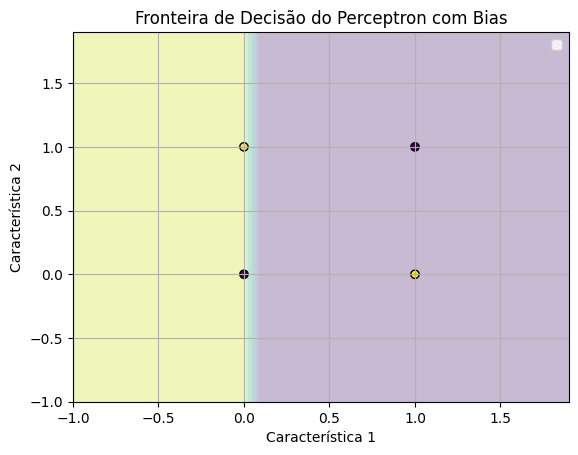

In [ ]:
# Input data (XOR - nonlinear)

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#-----------------------------
y_and = np.array([0, 1, 1, 0])
#-----------------------------


weights, bias = training_perceptron(X_and, y_and, learning_rate=0.1, n_iterations=100)

predicts = predict(X_and, weights, bias)

# Results
print("Pesos:", weights)
print("Bias:", bias)
print("Previsões:", predicts)
print("Acurácia:", calculate_accuracy(y_and, predicts), "%")

view_decision_border(X_and, y_and, weights, bias) # Visualization

Pesos: [0.2 0.1]
Bias: -0.20000000000000004
Previsões: [0 0 0 1]
Acurácia: 100.0 %


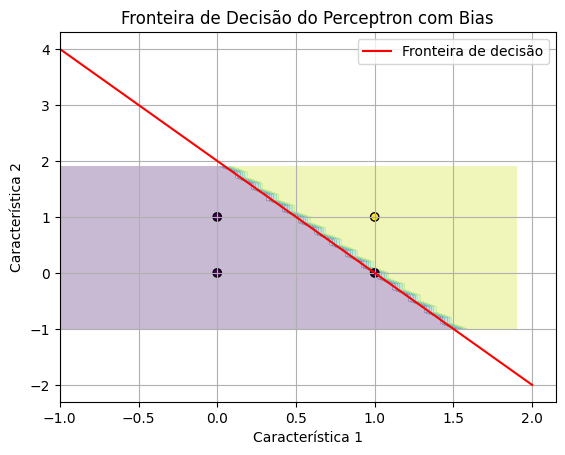

In [ ]:
# Input data (AND - linear)

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#-----------------------------
y_and = np.array([0, 0, 0, 1])
#-----------------------------


weights, bias = training_perceptron(X_and, y_and, learning_rate=0.1, n_iterations=100)

predicts = predict(X_and, weights, bias)

# Results
print("Pesos:", weights)
print("Bias:", bias)
print("Previsões:", predicts)
print("Acurácia:", calculate_accuracy(y_and, predicts), "%")

view_decision_border(X_and, y_and, weights, bias) # Visualization